In [8]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./energy_dataset.csv')

Step 1: Data exploration

In [4]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [5]:
# Setting Datetime as index
df = df.set_index('Datetime')

# Ensuring that the index is of datetime type
df.index = pd.to_datetime(df.index)

# Generating descriptive statistics of the DataFrame
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


Step 2: Time plot

In [12]:
# Setting pyplot style
#plt.style.use('seaborn')

import matplotlib.pyplot as plt
print(plt.style.available)

plt.style.use('seaborn-v0_8')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


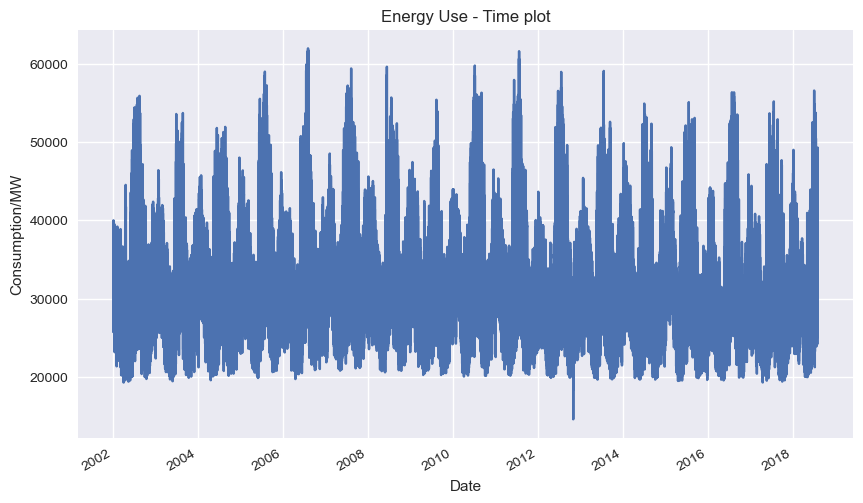

In [13]:
# Plotting time series
plt.figure(figsize=(10,6))
df['PJME_MW'].plot(title='Energy Use - Time plot')
plt.ylabel('Consumption/MW')
plt.xlabel('Date')
plt.show()

Key insights : 
The pattern in the data exhibits yearly seasonality, indicating recurring fluctuations in consumption over the course of each year.
Contrarily, the series does not display a clear trend of increasing or decreasing consumption over the years. Instead, the average consumption remains relatively constant or stationary.

Step 3: Seasonal Plots

In [15]:
# Creating new year, month, week, day, day_str, year_month features
# In order to visualize and pull out seasonal patterns, we need to create some features such as year, month, week, day, day_str, 
# and year_month.

In [16]:
# Extracting time-related features

df['year'] = df.index.year
df['month'] = df.index.month
df.reset_index(inplace=True)
df['week'] = df['Datetime'].dt.isocalendar().week
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.dayofweek
df['day_str'] = df['Datetime'].dt.strftime('%a')
df['year_month'] = df['Datetime'].dt.strftime('%Y_%m')
df.set_index('Datetime', inplace=True)

In [17]:
df.head()

,PJME_MW,year,month,week,hour,day,day_str,year_month
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,1,1,Tue,2002_12
2002-12-31 02:00:00,25147.0,2002,12,1,2,1,Tue,2002_12
2002-12-31 03:00:00,24574.0,2002,12,1,3,1,Tue,2002_12
2002-12-31 04:00:00,24393.0,2002,12,1,4,1,Tue,2002_12
2002-12-31 05:00:00,24860.0,2002,12,1,5,1,Tue,2002_12


3.1 Seasonal plot — Yearly consumption

In [26]:
# Prepare data for yearly plot 
df_yearly = (df[['year','PJME_MW']].dropna().groupby('year').mean().reset_index())
df_yearly.head()

,year,PJME_MW
0,2002,31565.617106
1,2003,31698.758621
2,2004,32270.434867
3,2005,33310.478648
4,2006,32409.269696


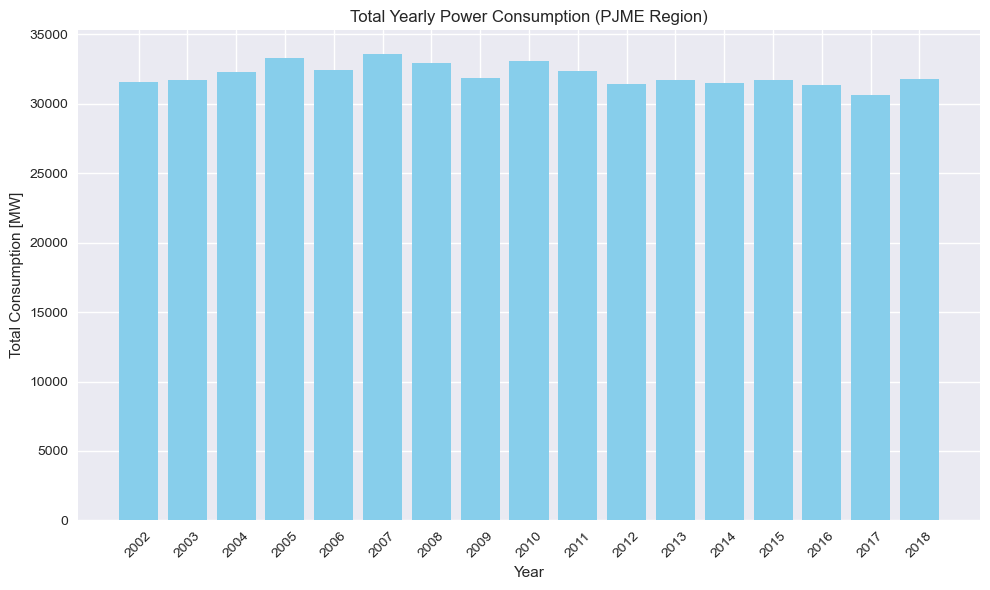

In [27]:
# Plot Total Yearly Consumption
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_yearly['year'], df_yearly['PJME_MW'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Consumption [MW]')
plt.title('Total Yearly Power Consumption (PJME Region)')
plt.xticks(df_yearly['year'], rotation=45)
plt.tight_layout()
plt.show()

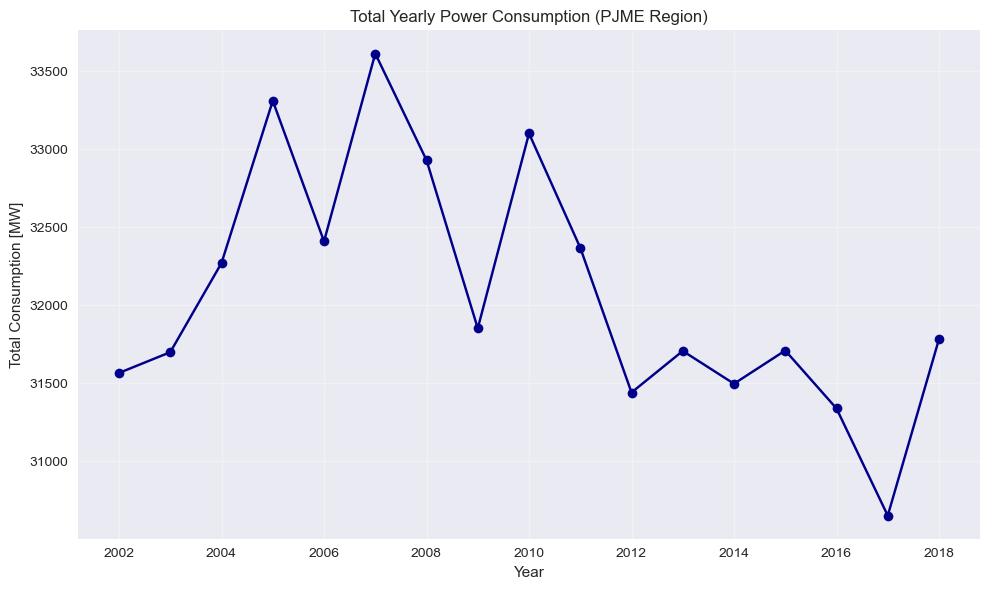

In [28]:
plt.figure(figsize=(10,6))
plt.plot(df_yearly['year'], df_yearly['PJME_MW'], marker='o', color='darkblue')
plt.xlabel('Year')
plt.ylabel('Total Consumption [MW]')
plt.title('Total Yearly Power Consumption (PJME Region)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

3.2 Seasonal plot — Monthly consumption

In [29]:
# Prepare data for monthly plot 
df_monthly = (df[['month','year','PJME_MW']].dropna().groupby(['month','year']).mean().reset_index())
df_monthly.head()


,month,year,PJME_MW
0,1,2002,31075.399731
1,1,2003,34985.219086
2,1,2004,36088.575269
3,1,2005,34725.545699
4,1,2006,32621.391129


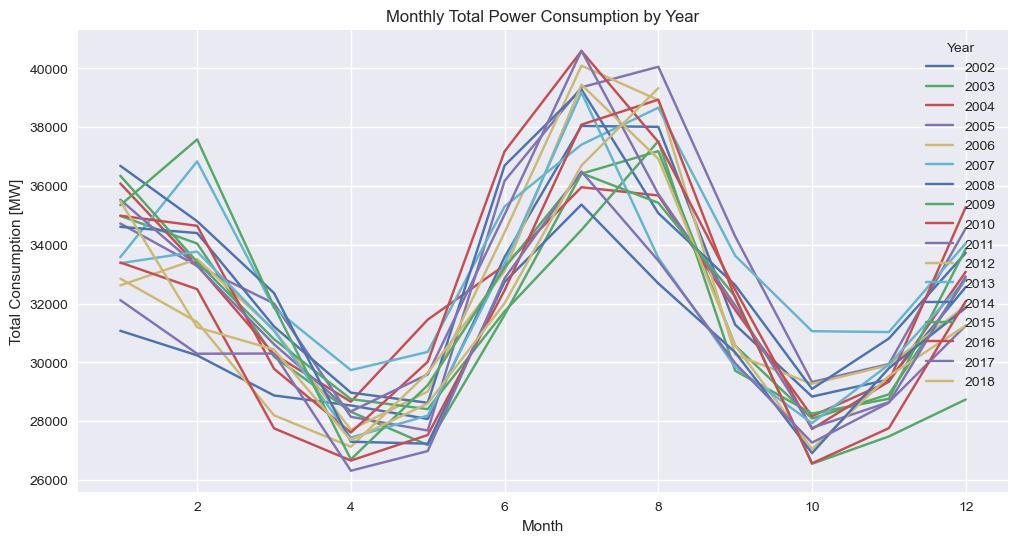

In [30]:
plt.figure(figsize=(12,6))
for year in df_monthly['year'].unique():
    data = df_monthly[df_monthly['year'] == year]
    plt.plot(data['month'], data['PJME_MW'], label=year)

plt.xlabel('Month')
plt.ylabel('Total Consumption [MW]')
plt.title('Monthly Total Power Consumption by Year')
plt.legend(title='Year')
plt.show()

Key insights:
The plot represents the monthly energy consumption over several years. Each line corresponds to a different year, illustrating how consumption fluctuates across months and years.

Consumption increases significantly during winter and peaks in summer, with minima in spring and autumn.

The plot indicates that there isn't a clear pattern of change in overall consumption across the years.

3.3 Seasonal plot — Weekly consumption

In [34]:
# Prepare data for weekly plot 
df_weekly = (df[['month', 'day_str', 'PJME_MW', 'day']].dropna().groupby(['day_str', 'month', 'day']).mean().reset_index())
# Sort by day number so days of week appear in order
df_weekly = df_weekly.sort_values('day')
df_weekly.head()

,day_str,month,day,PJME_MW
23,Mon,12,0,33140.695423
22,Mon,11,0,30125.117034
21,Mon,10,0,28675.235915
20,Mon,9,0,31215.032005
19,Mon,8,0,37490.943075


In [36]:
# Get unique months and define colors
months = df_weekly['month'].unique()
colors = plt.cm.get_cmap('tab20', len(months)).colors

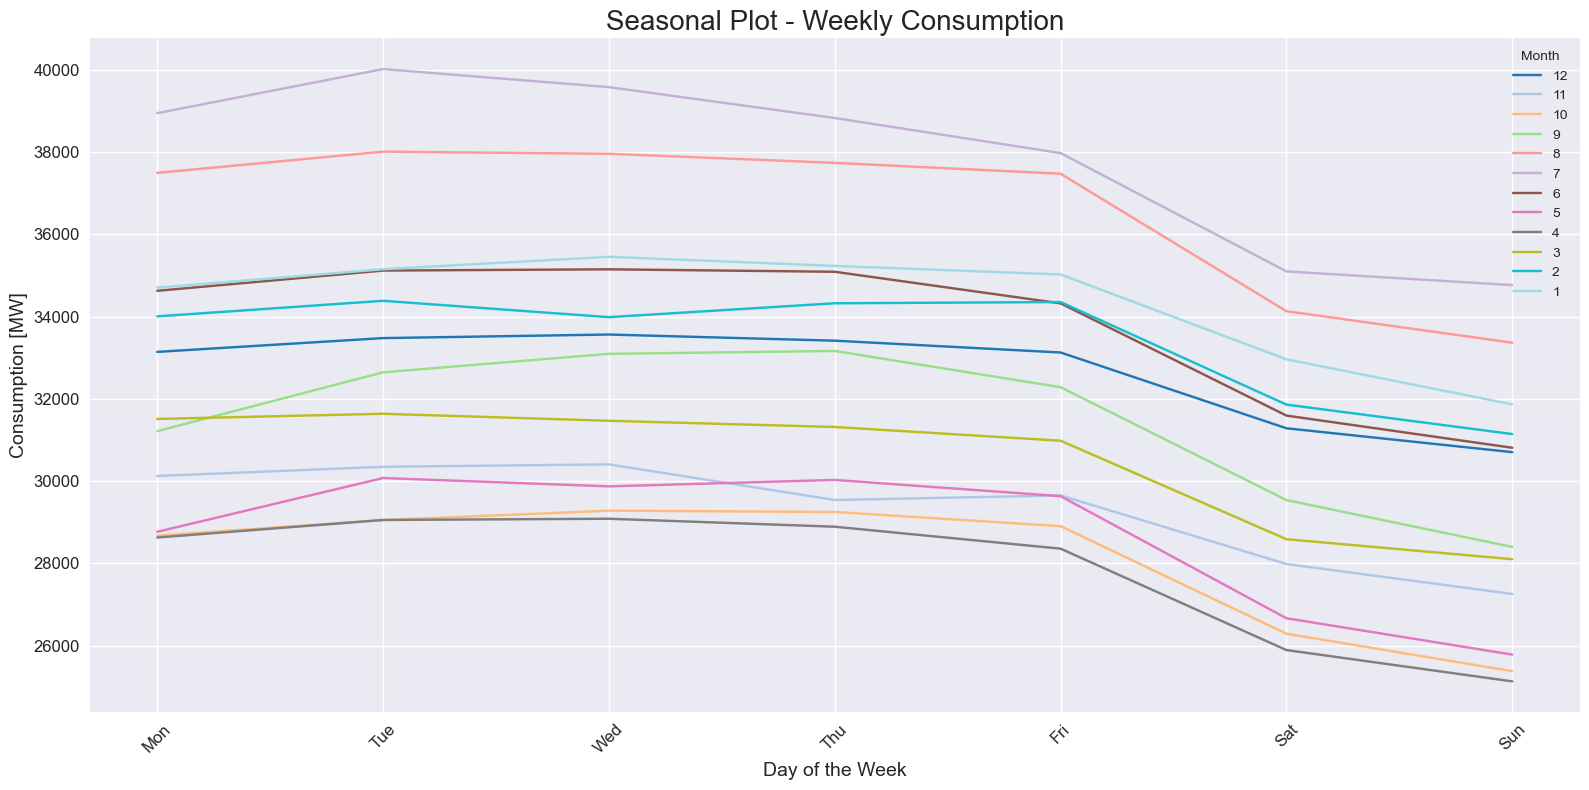

In [39]:
# Plot
plt.figure(figsize=(16, 8))

for i, month in enumerate(months):
    month_data = df_weekly[df_weekly['month'] == month]
    plt.plot(
        month_data['day_str'],
        month_data['PJME_MW'],
        color=colors[i],
        label=str(month)
    )

# Decorate plot
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Consumption [MW]', fontsize=14)
plt.title('Seasonal Plot - Weekly Consumption', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Month')
plt.tight_layout()
plt.show()

Key insights: The plot shows that weekly consumption peaks on Thursday and remains stable until Friday. During weekends, the consumption considerably decreases.

Another pattern is that July and August have high energy demand. Additionally, April, May, and November have lower consumption levels. This indicates that energy consumption increases during the hottest months, suggesting that cooling systems consume more energy than heating systems.

3.4 Seasonal plot — Daily consumption

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
df_daily = (
    df[['hour', 'day_str', 'PJME_MW']]
    .dropna()
    .groupby(['hour', 'day_str'])
    .mean()
    .reset_index()
)



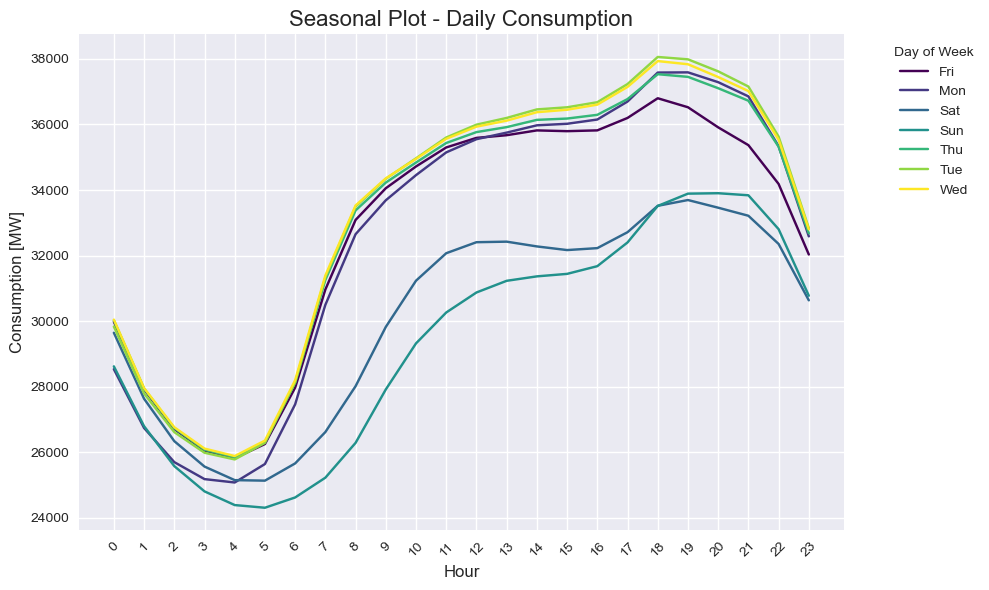

In [42]:
# Prepare colors
days = df_daily['day_str'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(days)))

# Plot
plt.figure(figsize=(10, 6))

for color, day in zip(colors, days):
    day_data = df_daily[df_daily['day_str'] == day]
    plt.plot(
        day_data['hour'],
        day_data['PJME_MW'],
        label=day,
        color=color
    )

# Decorate plot
plt.xticks(range(24), labels=[str(h) for h in range(24)], rotation=45)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Consumption [MW]', fontsize=12)
plt.title('Seasonal Plot - Daily Consumption', fontsize=16)
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Key insights from seasonal plots:

Yearly consumption does not vary significantly over the years, suggesting the potential use of yearly seasonality features derived from lagged or exogenous variables.

Weekly consumption follows a consistent pattern across months, indicating that weekly features derived from lagged or exogenous variables may be useful.

Daily consumption differs between weekdays and weekends, suggesting the use of categorical features to distinguish between regular weekdays and weekends.

Step 4: Box Plots

Boxplots help us identify data distribution. In brief, boxplots depict percentiles, including the first quartile (Q1), median (Q2), and third quartile (Q3) of a distribution. The whiskers represent the range of the data, providing insight into its variability. Values beyond the whiskers can be considered outliers.

Total consumption

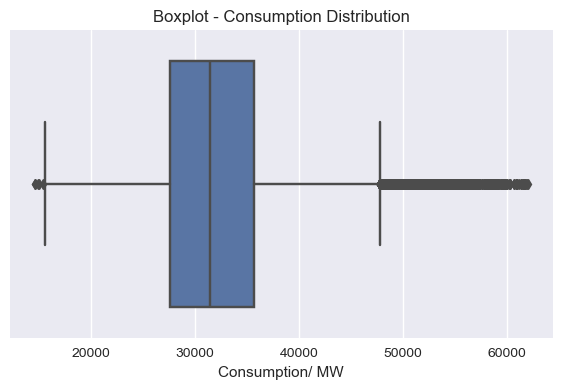

In [45]:

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='PJME_MW')
plt.xlabel('Consumption/ MW')
plt.title(f'Boxplot - Consumption Distribution');

Day month distribution

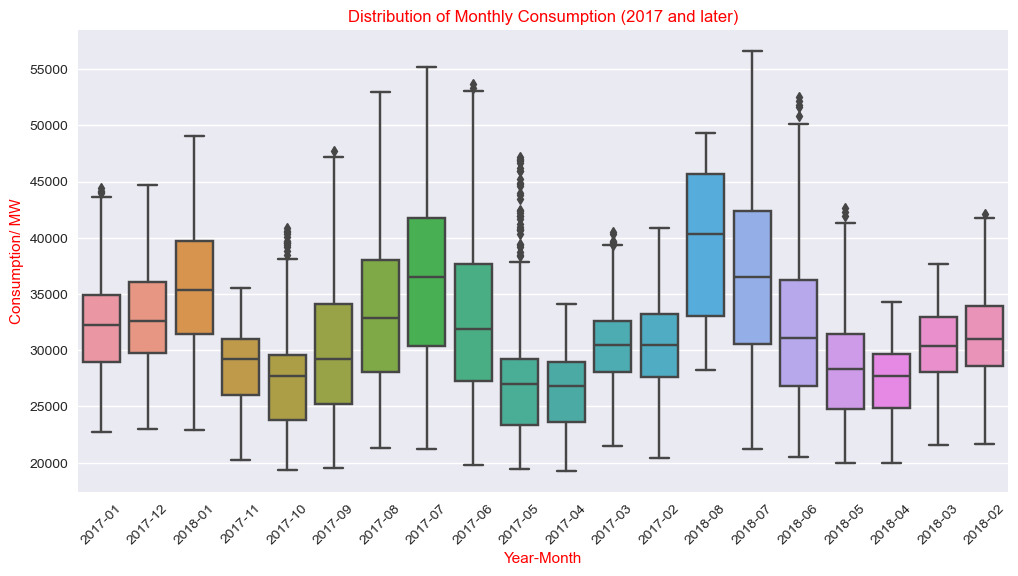

In [46]:

# Extracting year and month features
df['year'] = df.index.year
df['month'] = df.index.month
df['year_month'] = df.index.strftime('%Y-%m')

# Filtering data for years 2017 and later
df_plot = df[df['year'] >= 2017]

# Plotting boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_month', y='PJME_MW', data=df_plot)
plt.title('Distribution of Monthly Consumption (2017 and later)', color='red')
plt.xlabel('Year-Month', color ='red')
plt.ylabel('Consumption/ MW', color ='red')
plt.xticks(rotation=45)
plt.show()


Day distribution

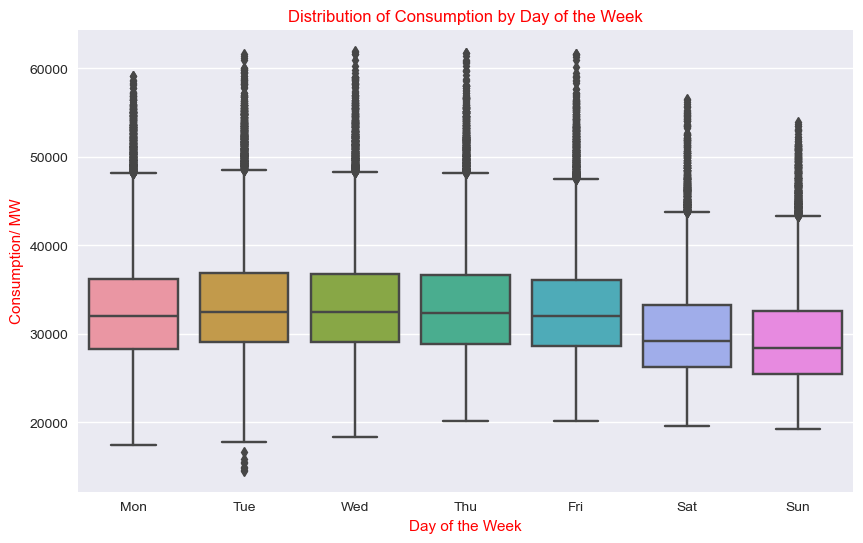

In [47]:
# Sorting the DataFrame by day of the week
df_plot = df[['day_str', 'day', 'PJME_MW']].sort_values(by='day')

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_str', y='PJME_MW', data=df_plot)
plt.title('Distribution of Consumption by Day of the Week', color ='red')
plt.xlabel('Day of the Week', color ='red')
plt.ylabel('Consumption/ MW', color='red')
plt.show()

Hour distribution

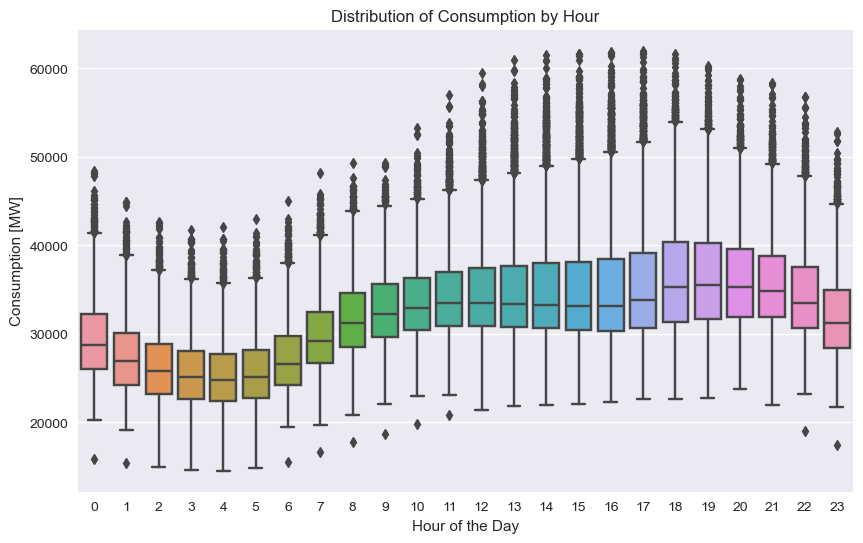

In [48]:
# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hour'], y=df['PJME_MW'])
plt.title('Distribution of Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Consumption [MW]')
plt.show()

Step 5: Time Series Decomposition

Step 5: Time Series Decomposition

A time series can be conceptualized as comprising three primary components: a trend component, a seasonal component, and a remainder component, which encompasses any other variability in the time series. In some cases, a time series may exhibit multiple seasonal components, corresponding to different seasonal periods, such as daily, weekly, monthly, or yearly cycles.

There are two primary types of decomposition methods: additive and multiplicative.

In additive decomposition, a series (𝑦) is represented as the sum of a seasonal component (𝑆), a trend component (𝑇), and a remainder (𝑅):

yt = St+Tt+Rt

Similarly, multiplicative decomposition can be expressed as:

yt = St*Tt*Rt

In summary, additive decomposition is most suitable for time series with constant variance, while multiplicative decomposition is better suited for time series with non-stationary variances.

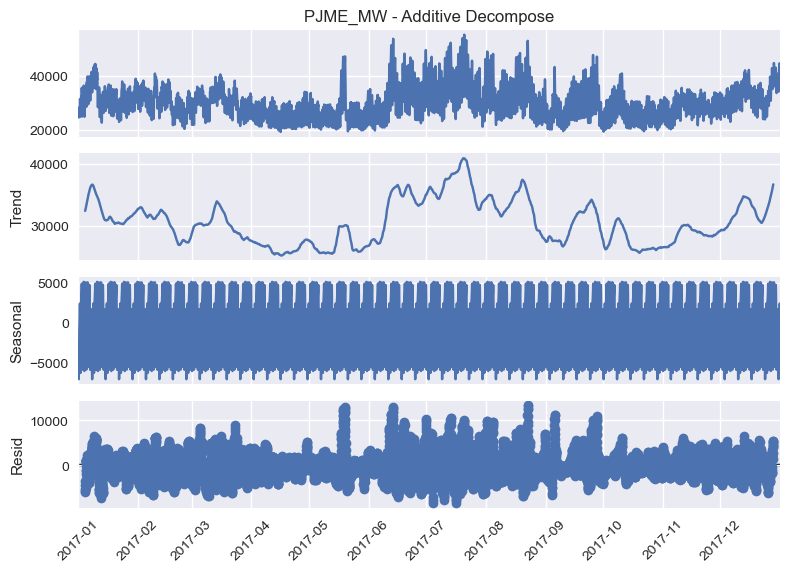

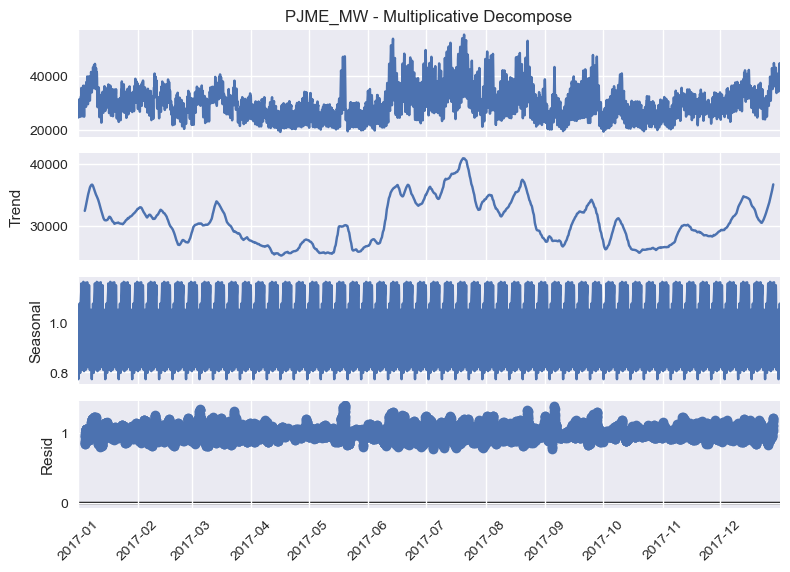

In [49]:
#Importing relevant modeule
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtering data for the year 2017 and reset index
df_plot = df[df['year'] == 2017].reset_index()

# Removing duplicate Datetime entries and sort by Datetime
df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')

# Setting Datetime column as index
df_plot = df_plot.set_index('Datetime')

# Copying the 'PJME_MW' column for both additive and multiplicative decompose
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

# Performing additive decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Performing multiplicative decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plotting additive decomposition
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)

# Plotting multiplicative decomposition
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)

# Displaying the plots
plt.show()

The plots above depict data from the year 2017. In both instances, we observe a trend with numerous local peaks, particularly during the summer months. Analysis of the seasonal component reveals multiple periodicities within the series. While the plots emphasize the weekly pattern, focusing on a specific month (such as January) of the same year reveals daily seasonality as well.

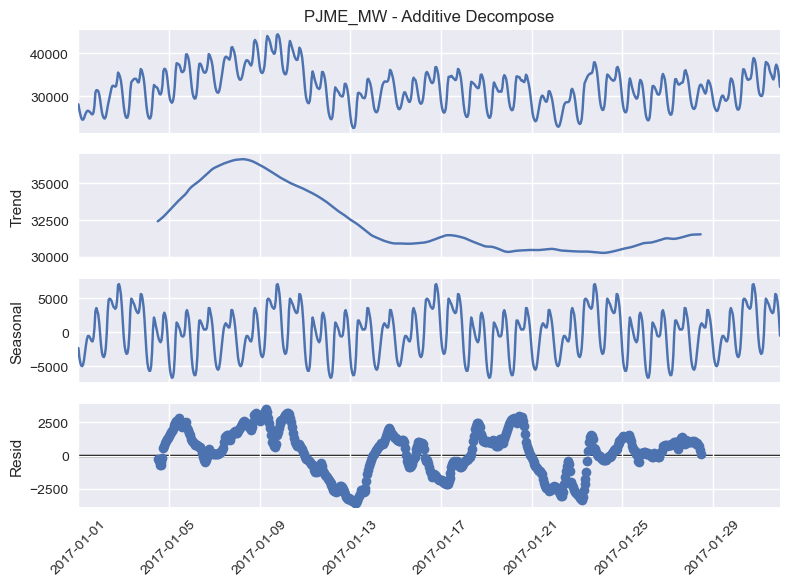

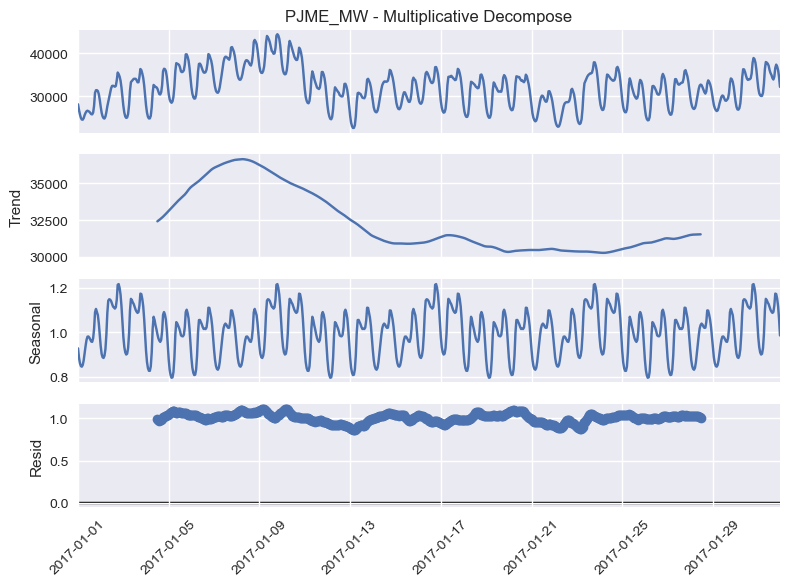

In [50]:
# Filter data for the year 2017 and reset index
df_plot = df[(df['year'] == 2017)].reset_index()

# Filter data for January
df_plot = df_plot[df_plot['month'] == 1]

# Copy the 'PJME_MW' column for both additive and multiplicative decompose
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

# Remove duplicate Datetime entries and sort by Datetime
df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')

# Set Datetime column as index
df_plot = df_plot.set_index('Datetime')

# Perform additive decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Perform multiplicative decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plot additive decomposition
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)

# Plot multiplicative decomposition
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)

# Display the plots
plt.show()

Step 6: Lag Analysis

In time series forecasting, a lag represents a past value of the series. For instance, in daily series, the first lag corresponds to the value the series had the day before, the second lag to the value from two days ago, and so forth.

Lag analysis involves calculating correlations between the series and a lagged iteration of itself, a concept known as autocorrelation. For a series lagged by k time points, the autocorrelation coefficient is defined as:

image.png

When data exhibits a trend, autocorrelations for small lags typically tend to be large and positive. This is because observations that are close in time also tend to be close in value. In the presence of seasonality, autocorrelation values tend to be larger at seasonal lags (and their multiples) compared to other lags. Data that display both trend and seasonality will manifest a combination of these effects.

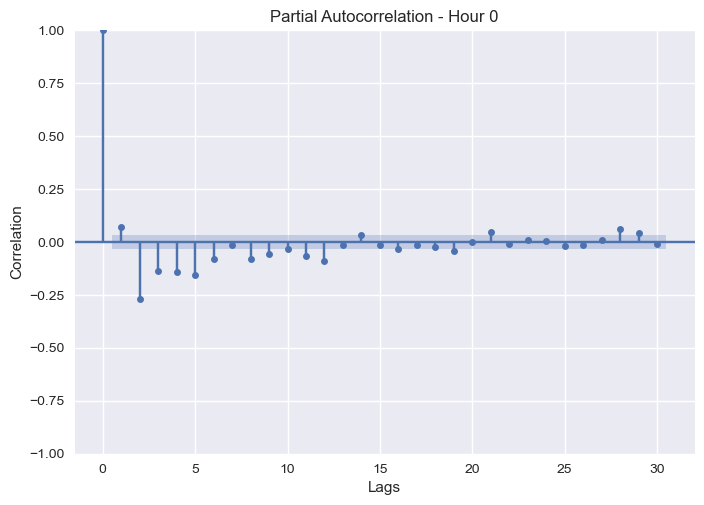

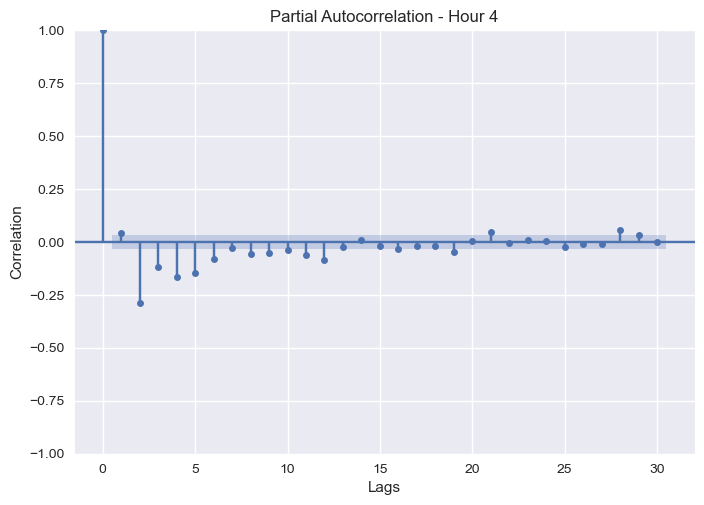

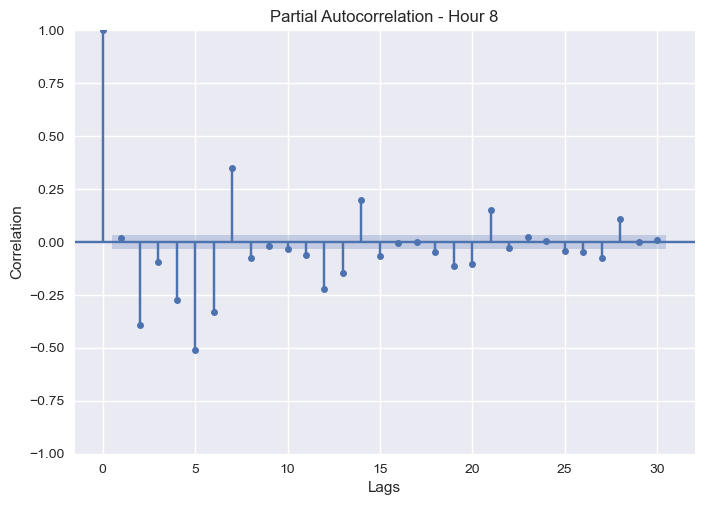

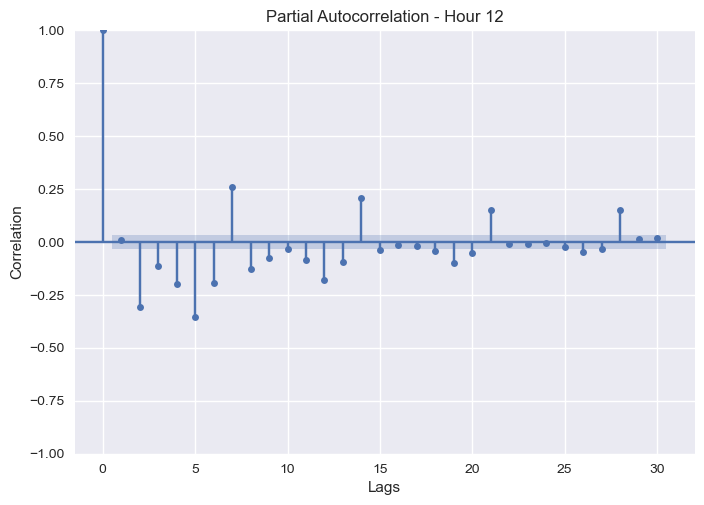

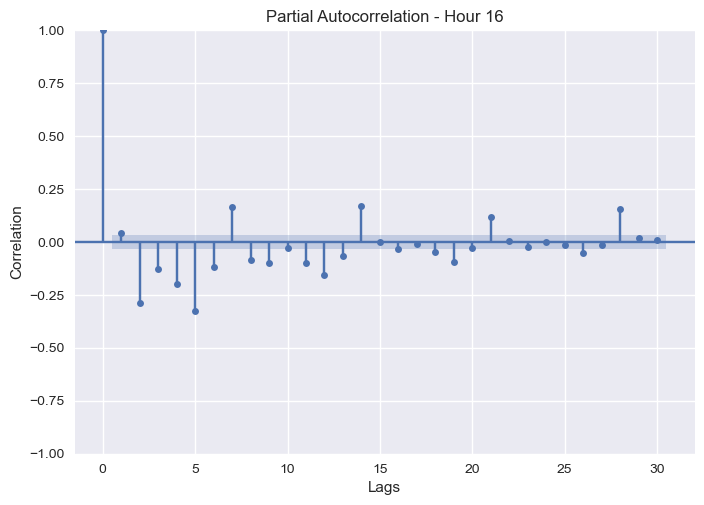

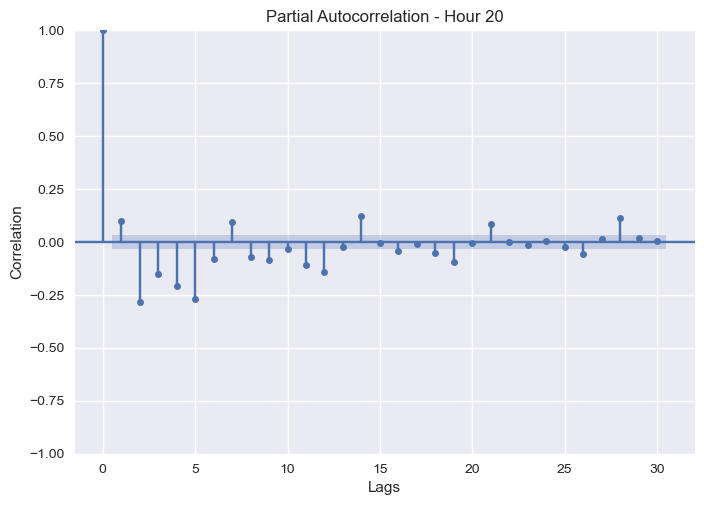

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf

actual = df['PJME_MW']
hours_of_interest = range(0, 24, 4)

for hour in hours_of_interest:
    hour_data = actual[actual.index.hour == hour].diff().dropna()
    plot_pacf(hour_data, lags=30, alpha=0.01)
    plt.title(f'Partial Autocorrelation - Hour {hour}')
    plt.ylabel('Correlation')
    plt.xlabel('Lags')
    plt.show()
